## What is a Deep Neural Network? 

Input layer + Hidden layer + output layer + activation function


In [1]:
import numpy as np
import math

In [2]:
# our activation function :

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [3]:
sigmoid(0.55*0.5+(-0.35)*0.45+0.15)

0.5664790559676278

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
# let's make a simple NN with two hidden layers

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(3,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [9]:
# how many  parameters i have go in here ?

layer1_2 = 4*3+4
layer2_3= 4*4+4
layer3_4=4*1+1

print(layer1_2+layer2_3+layer3_4)

41


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## Usa case 1 = MNIST DATASET

In [20]:
#import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

In [21]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


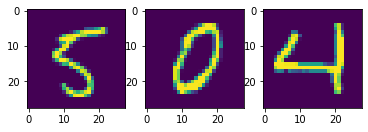

In [22]:
randindices=np.random.randint(x_train.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_train[randindices[0],:,:])
plt.subplot(1,3,2)
plt.imshow(x_train[randindices[1],:,:])
plt.subplot(1,3,3)
plt.imshow(x_train[randindices[2],:,:])

In [23]:
print(y_train[randindices[0]],y_train[randindices[1]],y_train[randindices[2]])

5 0 4


In [24]:
x_train[randindices[0],:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  60,  77,  77, 131, 166, 229,  59,   0,   0,   0,
          0,   0],
       [  

In [25]:
## Flatten & Normalize

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # normalize
x_test /= 255 # normalize
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [26]:
# one hot encoding for our classes

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Multi -layer Perceptron : MLP

In [27]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [28]:
model.compile(loss='categorical_crossentropy', ## cross entropy for classification multi class
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

In [29]:
batch_size = 128 # the learning is slow when batch is small
epochs = 20

In [31]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0750 - accuracy: 0.9775 - val_loss: 0.0686 - val_accuracy: 0.9811
Epoch 2/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.0625 - val_accuracy: 0.9812
Epoch 3/20
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0686 - val_accuracy: 0.9804
Epoch 4/20
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.0664 - val_accuracy: 0.9809
Epoch 5/20
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0661 - val_accuracy: 0.9814
Epoch 6/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.0534 - val_accuracy: 0.9853
Epoch 7/20
60000/60000 [==========================

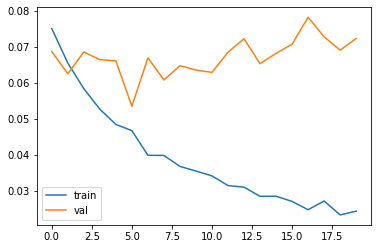

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07229152012516743
Test accuracy: 0.9846


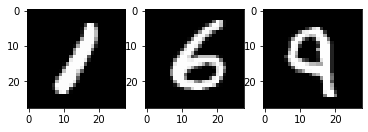

In [34]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)), cmap='gray')

In [35]:
predictions=model.predict(x_test)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

Le réseau reconnaît le chiffre 1 avec une confiance 99.99982118606567%.
Le réseau reconnaît le chiffre 6 avec une confiance 100.0%.
Le réseau reconnaît le chiffre 9 avec une confiance 99.99791383743286%.
